
***
***

# R2.07
## TP5. Coloration
***
***

Le but de ce TP est d'implémenter la coloration naïve de graphe, puis de voir ses limites
***
***
A few ground rules for your report:
* _your code must be clear, commented and use explicit variable names_
* _every algorithm must be tested on a few examples which show the different use cases_
* _markdown comments and examples must be provided, and the report should be self-contained_

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#magic
import warnings
warnings.filterwarnings('ignore')

We recall a few useful functions


In [2]:
def neighbours(A,v):
    """
     Return the array of (out-)neighbours of v in the graph whose adjacency matrix is A

    :param A: the adjacency matrix
    :type A: a two dimensional square numpy array containing only integers
    :param v: the considered vertex
    :type v: integer
    :return:  the array of (out-)neighbours of v in the graph whose adjacency matrix is A
    :rtype:  an array of integer
    """
        

    return np.where(A[v]==1)[0]




### Coloration Naïve
***
**To Do:**

**_question 1_**

**a**  Écrire une fonction revoyant le minimum des éléments d'une liste (triée) <tt> l1</tt> parmi les éléments n'appartenant pas à la liste  <tt> l2</tt>
**b**  Implémenter l'algorithme de coloration naïve de graphes





In [5]:
def MinCol(col,colneigh):
    """
     Return the minimum among col of element which do not belong to colneigh

    :param col,colneigh: colours
    :type col,colneigh: 2 one dimensional np array of int
    :return c:  minimal admissible colour
    :rtype:   int
    """
    i=0
    
    while True:
        
        if not col[i] in colneigh: 
            return col[i]
        i=i+1

        
print(MinCol(np.arange(10),np.array([0,1,2])))

print(MinCol(np.arange(10),np.array([1,2])))

print(MinCol(np.arange(10),np.array([0,2])))

def NaiveCol(A):
    """
    Return a (naive, possibly sub-optimal) graph colouring of A

    :param A: adjacency matrix
    :type A: a two dimensional square numpy array
    :return C: array of colors
    :rtype: one dimensional numpy array
    """
    n = A.shape[0]
    C = np.zeros(n, dtype=int)

    for s in range(n):
        neighbors = np.where(A[s] == 1)[0]
        used_colors = set(C[neighbors])

        color = 0
        while color in used_colors:
            color += 1
        
        C[s] = color

    return C

#Example usage:
A = np.array([[0, 1, 0, 1],
               [1, 0, 1, 0],
               [0, 1, 0, 1],
               [1, 0, 1, 0]])
print(NaiveCol(A))

                   




3
0
1
[1 2 1 0]


On teste avec un exemple simple, le cycle.

[1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 0]


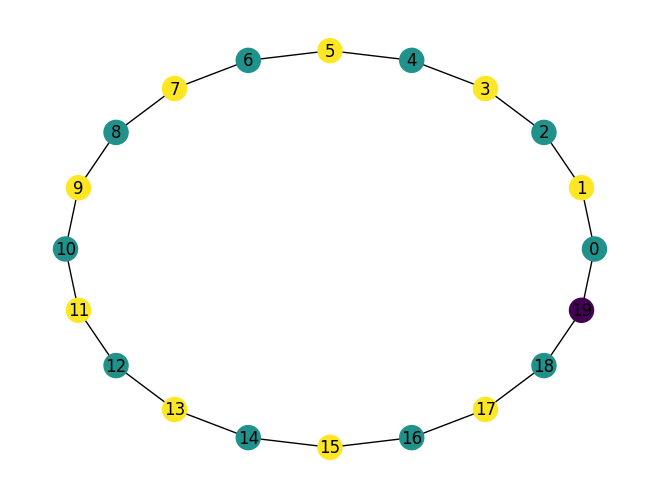

In [6]:
n=20
G=nx.generators.classic.cycle_graph(n)

A=nx.to_numpy_array(G)


C=NaiveCol(A)
print(C)

nx.draw(G, nodelist=range(n),node_color=C,with_labels=True,pos=nx.circular_layout(G))



[1 2 1 2 3 2 1 3 0 0]


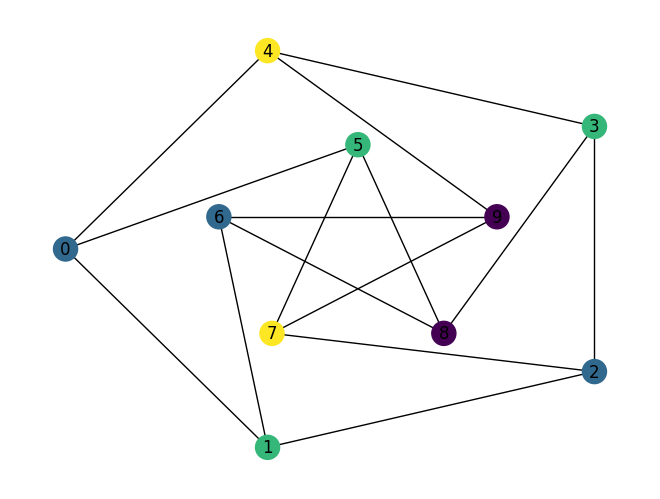

In [7]:

G=nx.generators.petersen_graph()

A=nx.to_numpy_array(G)


C=NaiveCol(A)
print(C)

nx.draw_shell(G,node_color=C, nlist=[range(5,10), range(5)],with_labels=True)

Tester avec d'autres exemples classiques venant [du manuel de référence networkx](https://networkx.org/documentation/stable/reference/generators.html)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19  0]


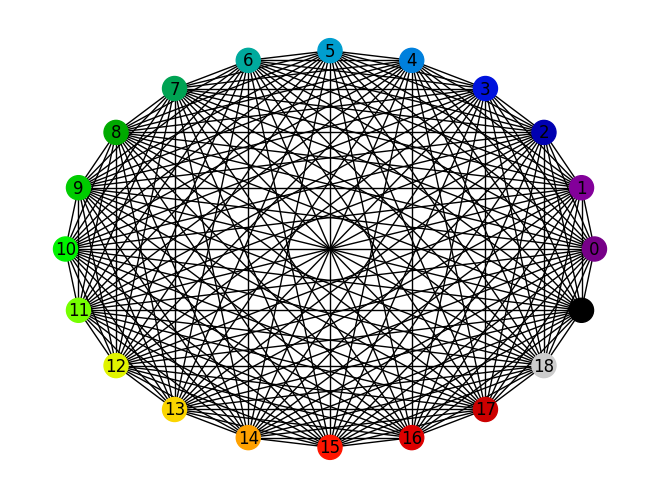

In [20]:
cmap = plt.cm.nipy_spectral

#cmap = plt.cm.tab20c

n=20
G=nx.generators.classic.complete_graph(n)

A=nx.to_numpy_array(G)


C=NaiveCol(A)
print(C)

nx.draw(G, nodelist=range(n),node_color=C,with_labels=True,pos=nx.circular_layout(G),cmap=cmap)

vmin=C.min()
vmax=C.max()
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])
plt.show()

[1 2 3 4 5 6 7 8 9 0]


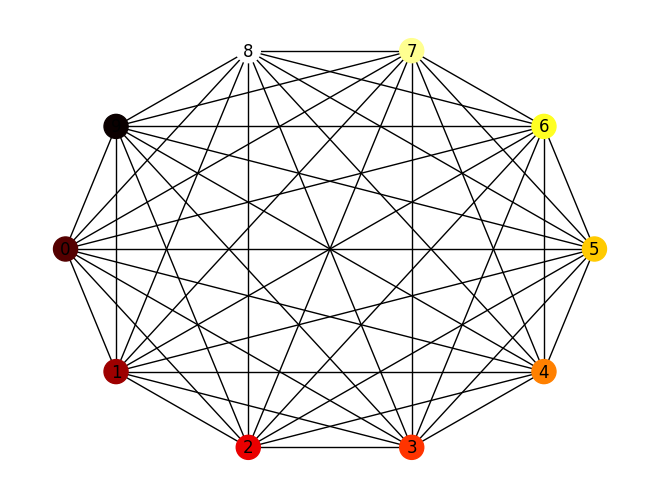

In [56]:

G=nx.complete_graph(10)

A=nx.to_numpy_array(G)


C=NaiveCol(A)
print(C)

nx.draw_shell(G, node_color=C, with_labels=True)

[1 1 1 1 1 0 0 0 0 0]


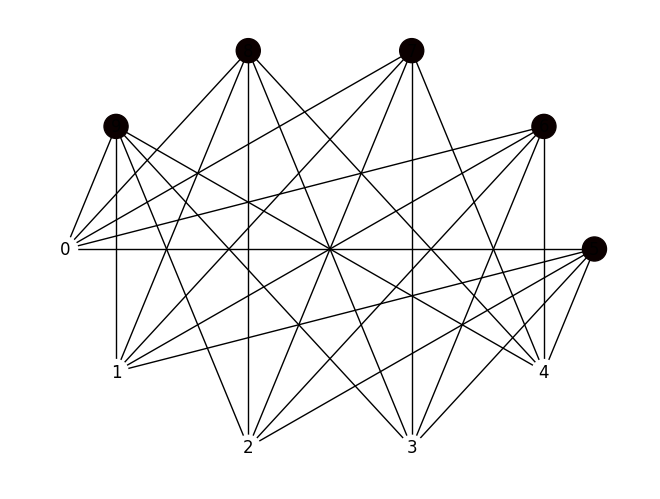

In [58]:

G=nx.turan_graph(10, 2)

A=nx.to_numpy_array(G)


C=NaiveCol(A)
print(C)

nx.draw_shell(G, node_color=C, with_labels=True)

Le but de cette question est d'estimer la qualité de cette algorithme.

On se concentre sur un cas particulier, le $2n$-cycle.


**_question 2_**

Compléter la cellule suivante où $n$ représente la taille du cycle et $t$ le nombre de coloriage naïf à tester sur $C_{2n}$. À chaque itération on teste un nouveau coloriage naïf et on augmente le nombre de couleurs disponibles de 1. L'objectif est d'obtenir une liste `cols` du nombre de couleurs différentes utilisées dans chaque coloriage naïf réalisé.



The colouring is optimal in 0.00000 percent of the cases


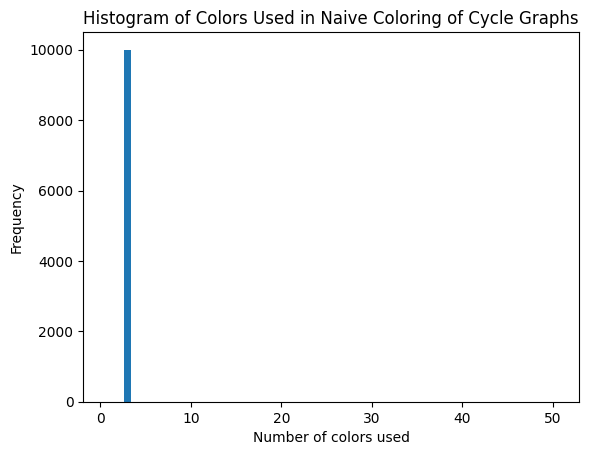

In [59]:
# Parameters
n = 50
t = 10000

# Initialize the arrays to store color counts
col_count = np.zeros(n, int)
cols = np.zeros(t, int)

# Generate the cycle graph with n nodes
G = nx.generators.classic.cycle_graph(n)
A = nx.to_numpy_array(G)

# Run t iterations of the naive coloring
for i in range(t):
    C = NaiveCol(A)
    unique_colors = len(np.unique(C))
    cols[i] = unique_colors
    col_count[unique_colors - 1] += 1


optimal_colorings = np.sum(cols == 2)
print(f'The colouring is optimal in {optimal_colorings / t:.5f} percent of the cases')






plt.hist(cols, bins=np.arange(1, n + 2), align='left', rwidth=0.8)
plt.xlabel('Number of colors used')
plt.ylabel('Frequency')
plt.title('Histogram of Colors Used in Naive Coloring of Cycle Graphs')
plt.show()


Transformer la cellule précédente en fonction et appliquer la pour n=50.

In [11]:
#TODO


**_question 3_**

Comprendre et commenter le code suivant.

In [34]:
M=50
col_n=np.zeros(M)
t=5000

#a bit long ~3 minutes


for nn in range(M):
    n=2*(nn+1)
    col_count=np.zeros(n+1,int)
    G=nx.generators.classic.cycle_graph(n)
    A=nx.to_numpy_array(G)
    
    
    print("treating cycle graph of size", n)
    
    
    for i in range(t):
        C=NaiveCol(A)
        c_max=max(C)+1
        col_count[c_max]+=1
    col_n[nn]=col_count[2]/t
    print(col_count)
    print(col_n[nn])

treating cycle graph of size 2
[   0    0 5000]
1.0
treating cycle graph of size 4
[   0    0    0 5000    0]
0.0
treating cycle graph of size 6
[   0    0    0 5000    0    0    0]
0.0
treating cycle graph of size 8
[   0    0    0 5000    0    0    0    0    0]
0.0
treating cycle graph of size 10
[   0    0    0 5000    0    0    0    0    0    0    0]
0.0
treating cycle graph of size 12
[   0    0    0 5000    0    0    0    0    0    0    0    0    0]
0.0
treating cycle graph of size 14
[   0    0    0 5000    0    0    0    0    0    0    0    0    0    0
    0]
0.0
treating cycle graph of size 16
[   0    0    0 5000    0    0    0    0    0    0    0    0    0    0
    0    0    0]
0.0
treating cycle graph of size 18
[   0    0    0 5000    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0]
0.0
treating cycle graph of size 20
[   0    0    0 5000    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0]
0.0
treating cycle graph

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]


Text(0, 0.5, 'Pourcentage')

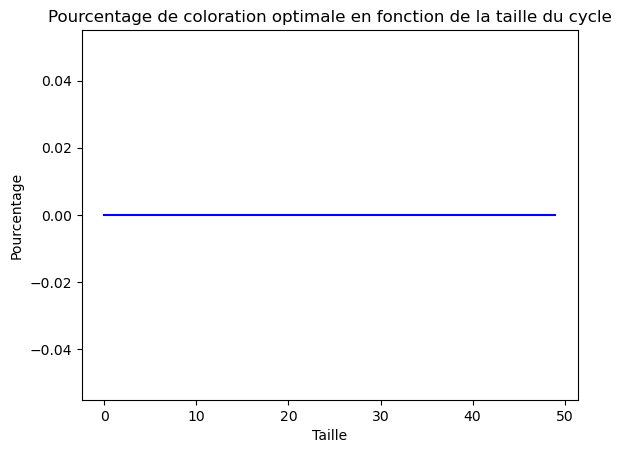

In [17]:
"""
TODO : tracé courbe
"""
print(col_n)
plt.close()
plt.plot(col_n, color='blue')
plt.title('Pourcentage de coloration optimale en fonction de la taille du cycle')
plt.xlabel('Taille')
plt.ylabel('Pourcentage')

In [ ]:
Nous pouvons réaliser les mêmes tests statistiques sur des graphes différentes :

In [12]:
n=20
G=nx.algorithms.bipartite.generators.random_graph(n,n,.2)


A=nx.to_numpy_array(G)


C=NaiveCol(A)
print(C)

nx.draw(G, nodelist=range(2*n),node_color=C,with_labels=True,pos=nx.circular_layout(G))

In [13]:
#TODO graphes bipartite